# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [ ]:
#subir el archivo perros_y_gatos.zip
# está acá: https://drive.google.com/file/d/1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm/view?usp=sharing\
!gdown --id 1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm

Downloading...
From: https://drive.google.com/uc?id=1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm
To: /content/perros_y_gatos.zip
90.8MB [00:01, 89.3MB/s]


In [ ]:
!unzip /content/perros_y_gatos.zip > /dev/null

In [ ]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [ ]:
cd /content

/content


In [ ]:
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [ ]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob("./*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [ ]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()

#### COMPLETAR #####
# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# max pooling f=2, s=2
model.add(layers.MaxPooling2D((2,2)))
# convolucional f=(3,3), # de filtros: 64, activación relu
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# max pooling f=2, s=2
model.add(layers.MaxPooling2D((2,2)))
# convolucional f=(3,3), # de filtros: 128, activación relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# max pooling f=2, s=2
model.add(layers.MaxPooling2D((2,2)))
# convolucional f=(3,3), # de filtros: 128, activación relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# max pooling f=2, s=2
model.add(layers.MaxPooling2D((2,2)))
# capa flatten
model.add(layers.Flatten())
# capa densa de 512 elementos activación relu
model.add(layers.Dense(512, activation='relu'))
# capa densa con un output de 1 elemento con activación sigmoidea
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# utilizar model.fit_generator para entrenar
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/5
100/100 [==============================] - 124s 1s/step - loss: 0.6935 - acc: 0.5055 - val_loss: 0.6833 - val_acc: 0.5400
Epoch 2/5
100/100 [==============================] - 124s 1s/step - loss: 0.6761 - acc: 0.5730 - val_loss: 0.6848 - val_acc: 0.5550
Epoch 3/5
100/100 [==============================] - 120s 1s/step - loss: 0.6579 - acc: 0.6130 - val_loss: 0.6521 - val_acc: 0.6300
Epoch 4/5
100/100 [==============================] - 119s 1s/step - loss: 0.6391 - acc: 0.6330 - val_loss: 0.6459 - val_acc: 0.6160
Epoch 5/5
100/100 [==============================] - 121s 1s/step - loss: 0.6270 - acc: 0.6535 - val_loss: 0.6369 - val_acc: 0.6360


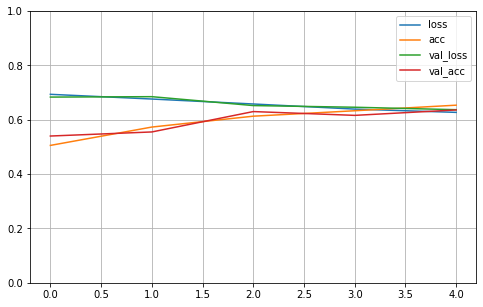

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 0.3,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range=0.4,
    zoom_range=0.3,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 0.2,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

In [ ]:
 #i = 1
 #for batch in train_datagen.flow(train_generator, batch_size=1,
 #                          save_to_dir='.', save_prefix='img', save_format='jpeg'):
 #    i += 1
 #    if i > 6:
 #        break

 #import matplotlib.image as mpimg
 #import glob
 #import os

 #files =glob.glob(".\*.jpeg")
 #plt.figure(figsize=(10,5))
 #i = 1
 #for f in files:
 #    if i > 6:
 #        break 
 #    plt.subplot(2,3,i)
 #    image = mpimg.imread(f)
 #    plt.imshow(image)
 #    i+=1
 #    os.remove(f)
    
 #plt.show()

In [ ]:
model = models.Sequential()

# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# max pooling f=2, s=2
model.add(layers.MaxPooling2D((2,2)))
# convolucional f=(3,3), # de filtros: 64, activación relu
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# max pooling f=2, s=2
model.add(layers.MaxPooling2D((2,2)))
# convolucional f=(3,3), # de filtros: 128, activación relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# max pooling f=2, s=2
model.add(layers.MaxPooling2D((2,2)))
# convolucional f=(3,3), # de filtros: 128, activación relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# max pooling f=2, s=2
model.add(layers.MaxPooling2D((2,2)))
# capa flatten
model.add(layers.Flatten())
# capa densa de 512 elementos activación relu
model.add(layers.Dense(512, activation='relu'))
# capa densa con un output de 1 elemento con activación sigmoidea
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/5
100/100 [==============================] - 118s 1s/step - loss: 0.6932 - acc: 0.5085 - val_loss: 0.6862 - val_acc: 0.5630
Epoch 2/5
100/100 [==============================] - 117s 1s/step - loss: 0.6803 - acc: 0.5410 - val_loss: 0.6717 - val_acc: 0.5650
Epoch 3/5
100/100 [==============================] - 115s 1s/step - loss: 0.6688 - acc: 0.5805 - val_loss: 0.6610 - val_acc: 0.5710
Epoch 4/5
100/100 [==============================] - 119s 1s/step - loss: 0.6574 - acc: 0.5795 - val_loss: 0.6476 - val_acc: 0.5930
Epoch 5/5
100/100 [==============================] - 116s 1s/step - loss: 0.6575 - acc: 0.6015 - val_loss: 0.6483 - val_acc: 0.6180


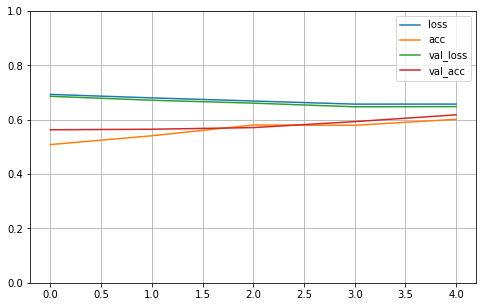

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
keras.backend.clear_session
del model

Mejora con data augmentation....aunque no tanto. Aunque creo que hay margen para seguir entrenando un poco.